# Virat Kohli International Centuries Prediction

In [21]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("ViratKohli.csv",encoding="latin-1")

In [11]:
df.head()

,No.,Runs,Against,Format,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,ODI,4,2,Kolkata,Home,24-12-2009,Won
1,2,102*,Bangladesh,ODI,3,2,Dhaka,Away,11-01-2010,Won
2,3,118,Australia,ODI,3,2,Visakhapatnam,Home,20-10-2010,Won
3,4,105,New Zealand,ODI,3,1,Guwahati,Home,28-11-2010,Won
4,5,100*,Bangladesh,ODI,4,1,Dhaka,Away,19-02-2011,Won


In [12]:
df.shape

(81, 10)

In [13]:
df.columns

Index(['No.', 'Runs', 'Against', 'Format', 'Position', 'Innings', 'Venue',
       'Ground', 'Date', 'Result'],
      dtype='object')

In [14]:
df = df.drop(['No.','Runs','Date'],axis='columns')

In [15]:
df.head()

,Against,Format,Position,Innings,Venue,Ground,Result
0,Sri Lanka,ODI,4,2,Kolkata,Home,Won
1,Bangladesh,ODI,3,2,Dhaka,Away,Won
2,Australia,ODI,3,2,Visakhapatnam,Home,Won
3,New Zealand,ODI,3,1,Guwahati,Home,Won
4,Bangladesh,ODI,4,1,Dhaka,Away,Won


In [16]:
df.isnull().sum()

Against     0
Format      0
Position    0
Innings     0
Venue       0
Ground      0
Result      0
dtype: int64

In [18]:
df['Result'].value_counts()

Result
Won      57
Lost     14
Drawn    10
Name: count, dtype: int64

In [19]:
format_rate = df.groupby('Format')['Result'].value_counts(normalize=True).mul(100).reset_index()

In [20]:
format_rate

,Format,Result,proportion
0,ODI,Won,84.000000
1,ODI,Lost,14.000000
2,ODI,Drawn,2.000000
3,T20,Won,100.000000
4,Test,Won,46.666667
5,Test,Drawn,30.000000
6,Test,Lost,23.333333


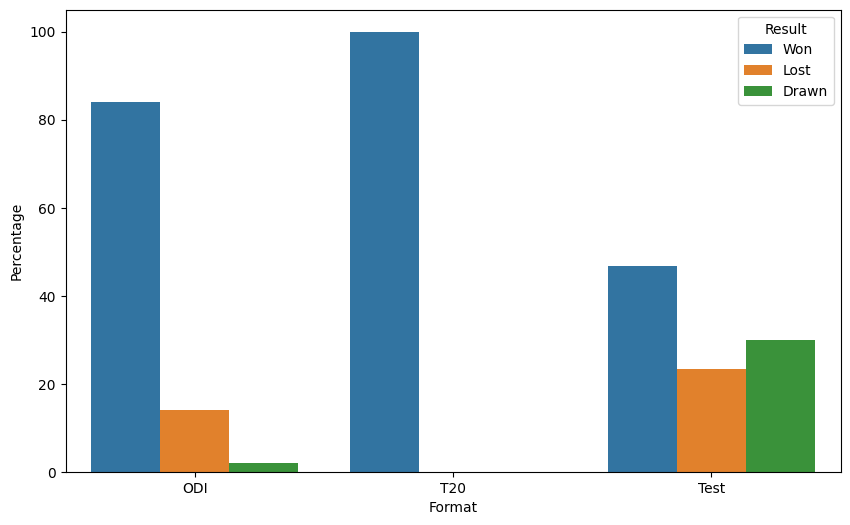

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Format',y='proportion',hue='Result',data=format_rate)
plt.xlabel('Format')
plt.ylabel('Percentage')
plt.show()

In [23]:
ground_rate = df.groupby('Ground')['Result'].value_counts(normalize=True).mul(100).reset_index()

In [24]:
ground_rate

,Ground,Result,proportion
0,Away,Won,56.756757
1,Away,Lost,29.729730
2,Away,Drawn,13.513514
3,Home,Won,78.947368
4,Home,Drawn,13.157895
5,Home,Lost,7.894737
6,Neutral,Won,100.000000


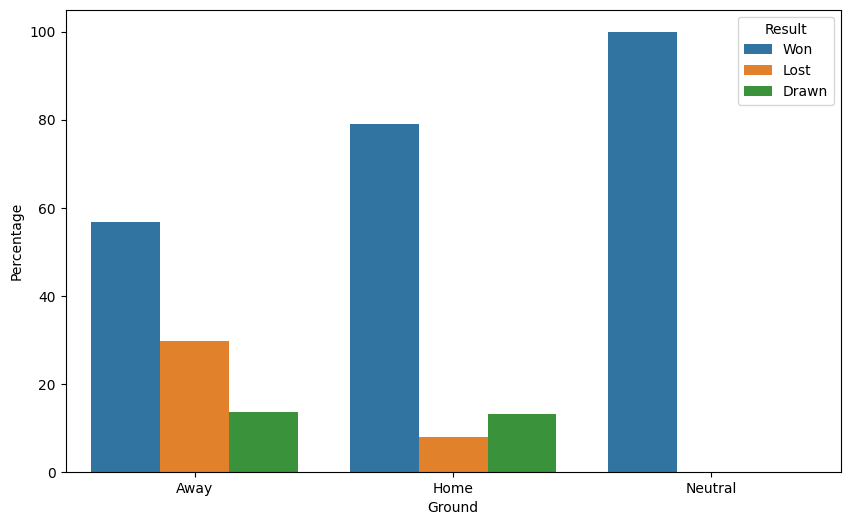

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Ground',y='proportion',hue='Result',data=ground_rate)
plt.xlabel('Ground')
plt.ylabel('Percentage')
plt.show()

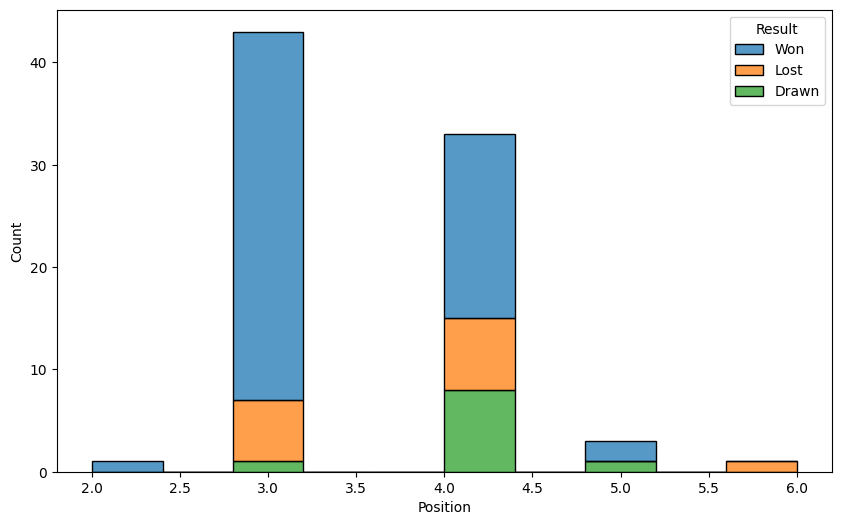

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(x='Position',hue='Result',data=df,multiple='stack',bins=10)
plt.xlabel('Position')
plt.show()

In [31]:
team_rate = df.groupby('Against')['Result'].value_counts(normalize=True).mul(100).reset_index()

In [32]:
team_rate

,Against,Result,proportion
0,Afghanistan,Won,100.000000
1,Australia,Lost,41.176471
2,Australia,Won,41.176471
3,Australia,Drawn,17.647059
4,Bangladesh,Won,100.000000
5,England,Won,62.500000
6,England,Lost,25.000000
7,England,Drawn,12.500000
8,New Zealand,Won,66.666667
9,New Zealand,Lost,22.222222


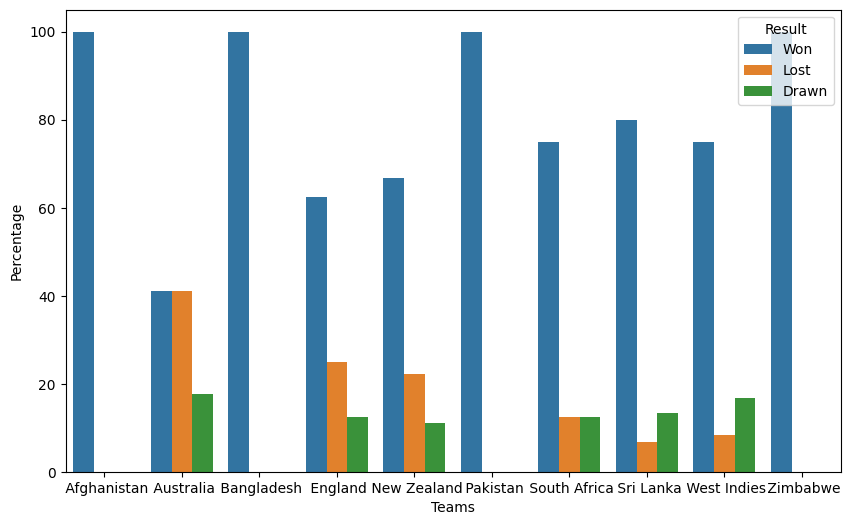

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='Against',y='proportion',hue='Result',data=team_rate)
plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.show()

In [35]:
df.head()

,Against,Format,Position,Innings,Venue,Ground,Result
0,Sri Lanka,ODI,4,2,Kolkata,Home,Won
1,Bangladesh,ODI,3,2,Dhaka,Away,Won
2,Australia,ODI,3,2,Visakhapatnam,Home,Won
3,New Zealand,ODI,3,1,Guwahati,Home,Won
4,Bangladesh,ODI,4,1,Dhaka,Away,Won


In [36]:
df.drop('Innings',axis=1,inplace=True)

In [37]:
df.head()

,Against,Format,Position,Venue,Ground,Result
0,Sri Lanka,ODI,4,Kolkata,Home,Won
1,Bangladesh,ODI,3,Dhaka,Away,Won
2,Australia,ODI,3,Visakhapatnam,Home,Won
3,New Zealand,ODI,3,Guwahati,Home,Won
4,Bangladesh,ODI,4,Dhaka,Away,Won


In [38]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()

In [39]:
df['Position'] = scaler.fit_transform(df[['Position']])

In [167]:
df['Team'] = encoder.fit_transform(df[['Team']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- 0 -> Afghanistan
- 1 -> Australia
- 2 -> Bangladesh
- 3 -> England
- 4 -> New Zealand
- 5 -> Pakistan
- 6 -> South Africa
- 7 -> Sri Lanka
- 8 -> West Indies
- 9 -> Zimbabwe

In [165]:
df['Format'] = encoder.fit_transform(df[['Format']])
df['Venue'] = encoder.fit_transform(df[['Venue']])
df['Ground'] = encoder.fit_transform(df[['Ground']])
df['Result'] = encoder.fit_transform(df[['Result']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site

- 0 -> Drawn
- 1 -> Lost
- 2 -> Won

In [46]:
df.head()

,Against,Format,Position,Venue,Ground,Result
0,7,0,0.759463,29,1,2
1,2,0,-0.778450,13,0,2
2,1,0,-0.778450,44,1,2
3,4,0,-0.778450,19,1,2
4,2,0,0.759463,13,0,2


In [48]:
df.rename({'Against':'Team'},axis=1,inplace=True)

In [49]:
df.head()

,Team,Format,Position,Venue,Ground,Result
0,7,0,0.759463,29,1,2
1,2,0,-0.778450,13,0,2
2,1,0,-0.778450,44,1,2
3,4,0,-0.778450,19,1,2
4,2,0,0.759463,13,0,2


In [50]:
X = df.drop('Result',axis=1)
Y = df['Result']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [141]:
model = LogisticRegression(penalty='l2',C=1.0,random_state=42)

In [142]:
model.fit(X_train,Y_train)

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [143]:
model.score(X_test,Y_test)

0.72

In [144]:
model.score(X_train,Y_train)

0.7678571428571429

In [145]:
yhat = model.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [147]:
accuracy_score(Y_test,yhat)

0.72

In [148]:
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.14      0.25         7
           2       0.70      1.00      0.82        16

    accuracy                           0.72        25
   macro avg       0.90      0.55      0.58        25
weighted avg       0.81      0.72      0.65        25



In [149]:
importance = model.coef_[0]

In [151]:
feature_importance_df = pd.DataFrame({
    'Features':X.columns,
    'Importance':importance
}).sort_values(by='Importance',ascending=False)

In [152]:
feature_importance_df

,Features,Importance
1,Format,0.411025
4,Ground,0.165208
2,Position,0.112236
0,Team,0.087097
3,Venue,0.029113


In [155]:
predictions_df = X_test.copy()

In [157]:
predictions_df = pd.DataFrame({
    'Team':predictions_df['Team'],
    'Format':predictions_df['Format'],
    'Ground':predictions_df['Ground'],
    'Result':yhat
})

In [159]:
predictions_df.head()

,Team,Format,Ground,Result
30,1,2,0,0
0,7,0,1,2
22,4,0,0,2
31,5,0,2,2
18,9,0,0,2


In [163]:
predictions_df['Team'].replace({0:'Afghanistan',1:'Australia',2:'Bangladesh',3:'England',4:'New Zealand',5:'Pakistan',6:'South Africa',7:'Sri Lanka',8:'West Indies',9:'Zimbabwe'},inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_2996\205767222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predictions_df['Team'].replace({0:'Afghanistan',1:'Australia',2:'Bangladesh',3:'England',4:'New Zealand',5:'Pakistan',6:'South Africa',7:'Sri Lanka',8:'West Indies',9:'Zimbabwe'},inplace=True)


In [164]:
predictions_df.head()

,Team,Format,Ground,Result
30,Australia,2,0,0
0,Sri Lanka,0,1,2
22,New Zealand,0,0,2
31,Pakistan,0,2,2
18,Zimbabwe,0,0,2


In [170]:
predictions_df['Format'].replace({0:'ODI',1:'Test',2:'T20'},inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_2996\1547127082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predictions_df['Format'].replace({0:'ODI',1:'Test',2:'T20'},inplace=True)


In [171]:
df['Ground'].value_counts()

Ground
1    38
0    37
2     6
Name: count, dtype: int64

In [172]:
predictions_df['Ground'].replace({0:'Away',1:'Home',2:'Neutral'},inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_2996\3098424481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predictions_df['Ground'].replace({0:'Away',1:'Home',2:'Neutral'},inplace=True)


In [173]:
predictions_df['Result'].replace({0:'Drawn',1:'Lost',2:'Won'},inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_2996\273760530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predictions_df['Result'].replace({0:'Drawn',1:'Lost',2:'Won'},inplace=True)


In [174]:
predictions_df.head()

,Team,Format,Ground,Result
30,Australia,T20,Away,Drawn
0,Sri Lanka,ODI,Home,Won
22,New Zealand,ODI,Away,Won
31,Pakistan,ODI,Neutral,Won
18,Zimbabwe,ODI,Away,Won


In [176]:
predictions_df.to_csv('predicted.csv')
feature_importance_df.to_csv('feature_importance.csv')